In [11]:
# IMPORTING LIBRARIES 

# Data Manipulation and Exploration Libraries
import numpy as np
import pandas as pd

# Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # for data preprocessing

#to supress warnings
import warnings
warnings.filterwarnings('ignore')


In [12]:
df=pd.read_csv("nifty50_cleaned.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2023-08-07,19576.85,19620.45,19524.80,19597.30,216586074.0,21655.87
1,2023-08-08,19627.20,19634.40,19533.10,19570.85,260294052.0,25437.47
2,2023-08-09,19578.80,19645.50,19467.50,19632.55,266495074.0,23201.75
3,2023-08-10,19605.55,19623.60,19495.40,19543.10,312193785.0,29430.34
4,2023-08-11,19554.25,19557.75,19412.75,19428.30,235524048.0,24521.24


In [13]:
# creating new features for better exploration and analyzation
# creating a variable called prev close which will gave the closing values of the previous days
df['Prev Close'] = df['Close'].shift(1)

# creating a variable called prev high which will gave the highest values of the previous days
df['Prev High'] = df['High'].shift(1)

# creating a variable called prev low which will gave the lowest values of the previous days
df['Prev Low'] = df['Low'].shift(1)



In [14]:
# creating features for rolling mean and rolling standard deviationw ith a window of 7 days
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()


In [15]:
#checking for null values 
print("\n COUNT OF NULL VALUES CREATED DUE TO CREATING NEW FEAUTURES \n")
df.isna().sum()



 COUNT OF NULL VALUES CREATED DUE TO CREATING NEW FEAUTURES 



Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
Prev Close         1
Prev High          1
Prev Low           1
Rolling_Mean_7     6
Rolling_Std_7      6
dtype: int64

In [16]:
# Dropping rows with NaN/ values created by shifting
df.dropna(inplace=True)

In [17]:
#checking for null values 
print("\n COUNT OF NULL VALUES AFTER DROPPING THEM \n")
print(df.isna().sum()) 





 COUNT OF NULL VALUES AFTER DROPPING THEM 

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
Prev Close         0
Prev High          0
Prev Low           0
Rolling_Mean_7     0
Rolling_Std_7      0
dtype: int64


In [18]:
print("\n LIST OF COLUMNS \n")
a= df.columns
print(list(a))


 LIST OF COLUMNS 

['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)', 'Prev Close', 'Prev High', 'Prev Low', 'Rolling_Mean_7', 'Rolling_Std_7']


In [19]:
print("\n DATASEET AFTER FEATURE ENGINEERING AND DATA SCALING \n")
df.info()


 DATASEET AFTER FEATURE ENGINEERING AND DATA SCALING 

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 6 to 248
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             243 non-null    object 
 1   Open             243 non-null    float64
 2   High             243 non-null    float64
 3   Low              243 non-null    float64
 4   Close            243 non-null    float64
 5   Shares Traded    243 non-null    float64
 6   Turnover (₹ Cr)  243 non-null    float64
 7   Prev Close       243 non-null    float64
 8   Prev High        243 non-null    float64
 9   Prev Low         243 non-null    float64
 10  Rolling_Mean_7   243 non-null    float64
 11  Rolling_Std_7    243 non-null    float64
dtypes: float64(11), object(1)
memory usage: 24.7+ KB


In [20]:
#converting date column to date time datatype 
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.describe()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Prev Close,Prev High,Prev Low,Rolling_Mean_7,Rolling_Std_7
count,243,243.000000,243.000000,243.000000,243.000000,2.430000e+02,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,2024-02-10 04:56:17.777777664,21648.952675,21735.440329,21537.888477,21643.273868,3.076433e+08,29619.827055,21623.261728,21715.391564,21517.612757,21583.580541,168.561654
min,2023-08-16 00:00:00,18928.750000,19041.700000,18837.850000,18857.250000,1.906457e+07,1572.770000,18857.250000,19041.700000,18837.850000,19052.792857,42.458317
25%,2023-11-12 12:00:00,19834.500000,19871.150000,19774.150000,19811.675000,2.360702e+08,22470.865000,19811.425000,19858.450000,19770.750000,19786.746429,108.183481
50%,2024-02-09 00:00:00,21861.500000,21964.300000,21726.950000,21853.800000,2.924338e+08,28661.040000,21840.050000,21953.850000,21715.150000,21791.578571,153.636252
75%,2024-05-11 12:00:00,22567.975000,22641.625000,22427.675000,22517.025000,3.591669e+08,34472.830000,22514.175000,22627.725000,22422.300000,22503.842857,205.044615
max,2024-08-07 00:00:00,25030.950000,25078.300000,24956.400000,25010.900000,1.006105e+09,93786.440000,25010.900000,25078.300000,24956.400000,24802.014286,533.080982
std,NaN,1632.082077,1647.318867,1611.385714,1633.086051,1.081320e+08,11061.804443,1630.219499,1645.162201,1608.937137,1611.611971,90.041566


In [22]:
print("data pre processing is complete!!")

data pre processing is complete!!


<Figure size 1400x700 with 0 Axes>

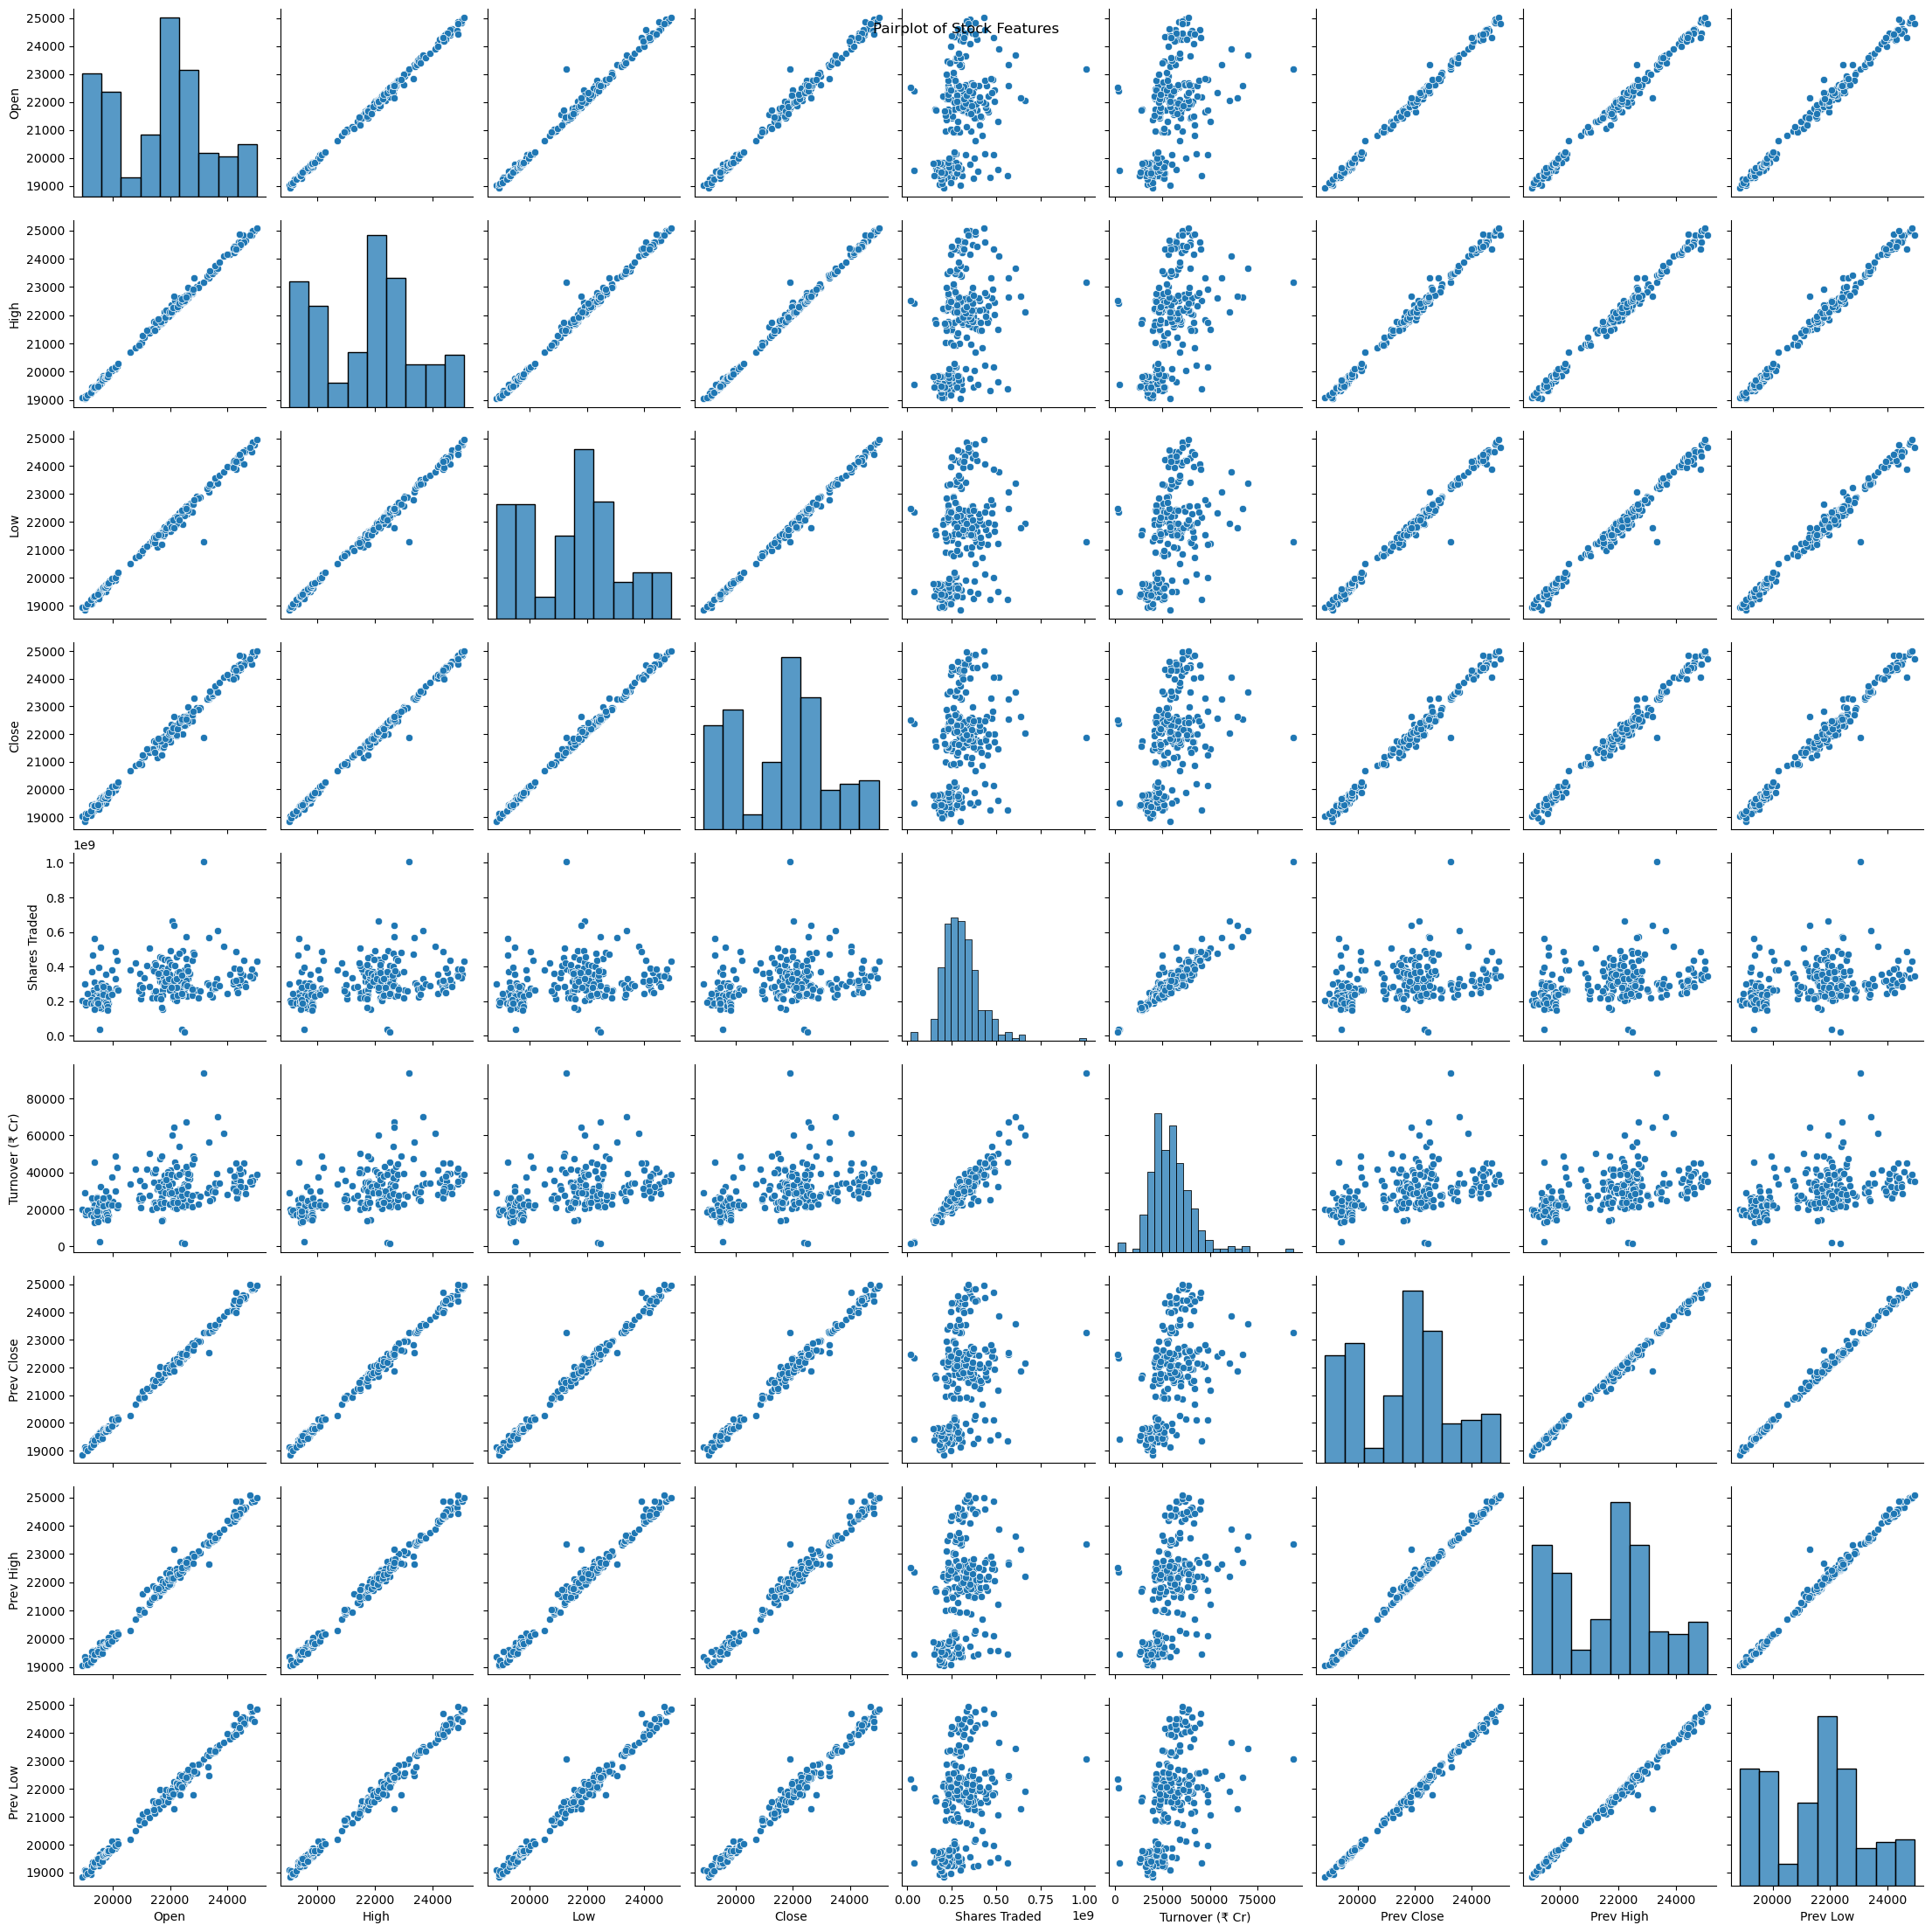

In [23]:
# Plotting relationships between features
plt.figure(figsize=(14, 7)) #defining the size of the figure
#list of all the columns we want to see a relationship between 
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)', 'Prev Close', 'Prev High', 'Prev Low']])
plt.suptitle('Pairplot of Stock Features')
plt.show()

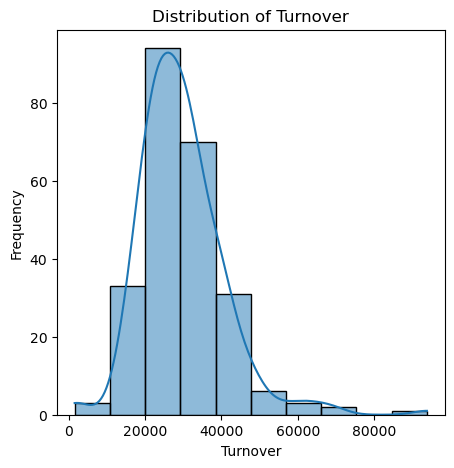

In [24]:
# Plotting the distribution of 'Turnover'
plt.figure(figsize=(5,5))
sns.histplot(df["Turnover (₹ Cr)"], bins=10, kde=True)
plt.title('Distribution of Turnover')
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.show()


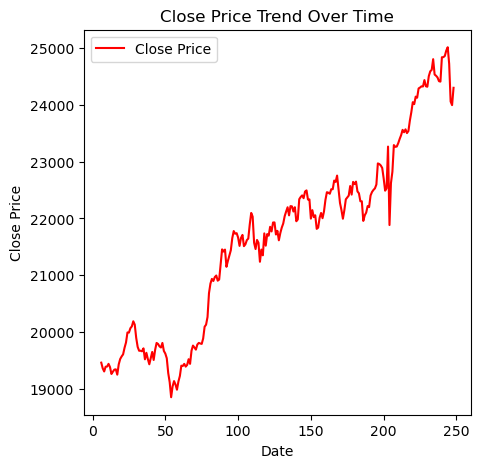

through the plot we can say that in general the closing prices have shown an increase over time


In [25]:
# Plotting the closing price trend
plt.figure(figsize=(5,5))
plt.plot(df.index, df['Close'], label='Close Price', color='red')
plt.title('Close Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print("through the plot we can say that in general the closing prices have shown an increase over time")

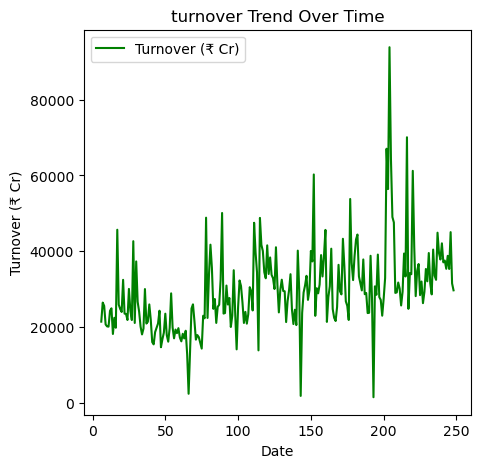

through the graph we can deduce that the turnover over time has remain somwehat constant with gradual increase in general


In [26]:
# Plotting the turnover trend
plt.figure(figsize=(5,5))
plt.plot(df.index, df['Turnover (₹ Cr)'], label='Turnover (₹ Cr)', color='green')
plt.title('turnover Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.legend()
plt.show()
print("through the graph we can deduce that the turnover over time has remain somwehat constant with gradual increase in general")

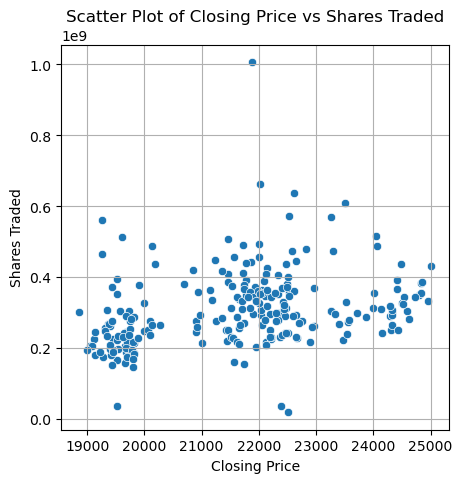

the graph shows us the relation between the closing prices and share traded 


In [27]:
# creating a scatter plot between closing proces and share traded 
plt.figure(figsize=(5,5))
sns.scatterplot(x='Close', y='Shares Traded', data=df)

plt.title('Scatter Plot of Closing Price vs Shares Traded')
plt.xlabel('Closing Price')
plt.ylabel('Shares Traded')
plt.grid(True)
plt.show()

print("the graph shows us the relation between the closing prices and share traded ")

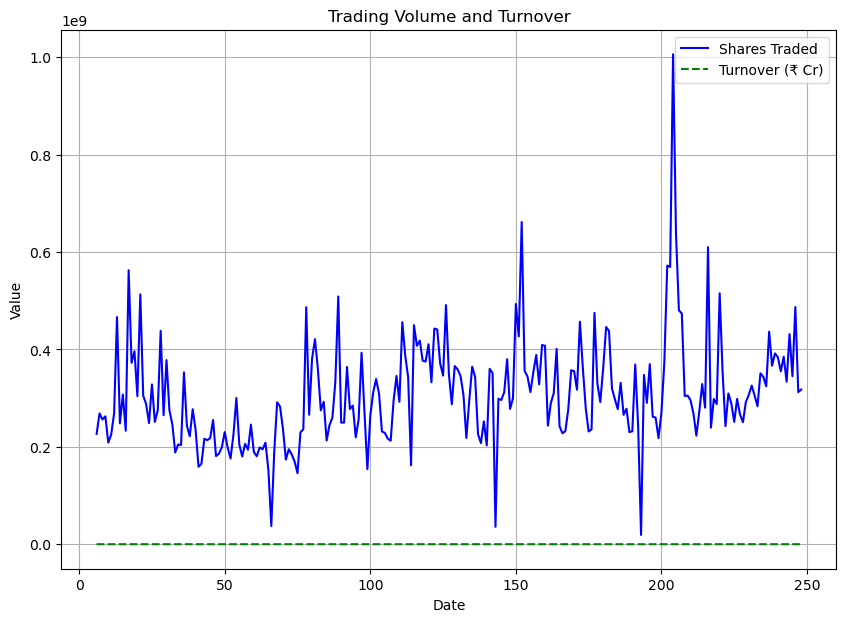

In [28]:
# Plotting a  Shares Traded and Turnover on the same plot
plt.figure(figsize=(10,7))
#plotting shares traded 
plt.plot(df.index, df['Shares Traded'], label='Shares Traded', color='blue')
#plotting turnover 
plt.plot(df.index, df['Turnover (₹ Cr)'], label='Turnover (₹ Cr)', color='green', linestyle='--')
plt.title('Trading Volume and Turnover')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

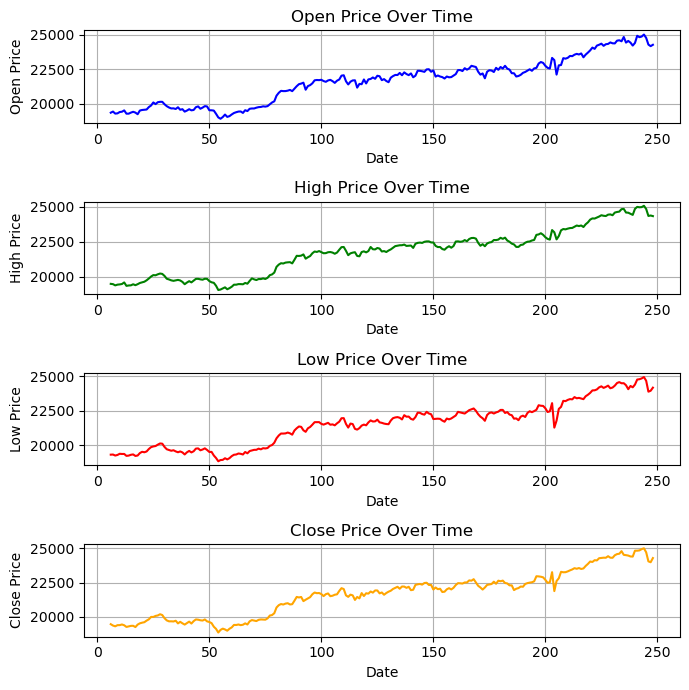

In [29]:
# creating a subplot with anaysing multiple columns trend over time
plt.figure(figsize=(7,7))

# creating for open prices of the day 
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Open'], color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)

# plotting for high prices 
plt.subplot(4, 1, 2)
plt.plot(df.index, df['High'], color='green')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)

# plotting for low prices 
plt.subplot(4, 1, 3)
plt.plot(df.index, df['Low'], color='red')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)

# creating for close prices of the day 
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Close'], color='orange')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Adjusting layout to prevent overlap
plt.tight_layout()

plt.show()

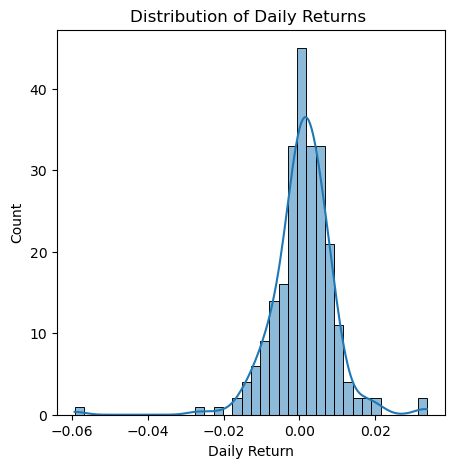

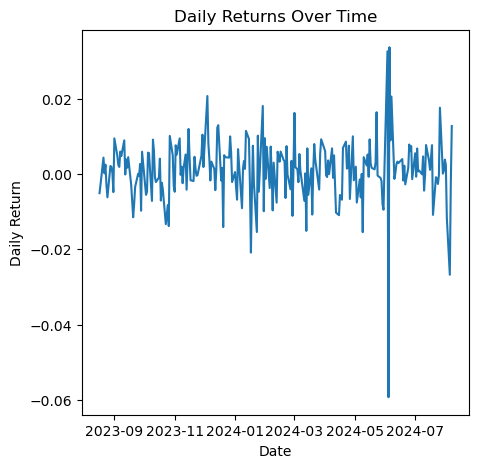

In [30]:
#creating a daily return column which shows the percentage change in the price of an asset from one day to the next
df['Daily Return'] = df['Close'].pct_change()

#creating a distribution for the daily return columns
plt.figure(figsize=(5,5))
sns.histplot(df['Daily Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns ')
plt.show()

#creating a lineplot analyzing the dail returns over time 
plt.figure(figsize=(5,5))
sns.lineplot(data=df, x='Date', y='Daily Return')
plt.title('Daily Returns Over Time')
plt.show()


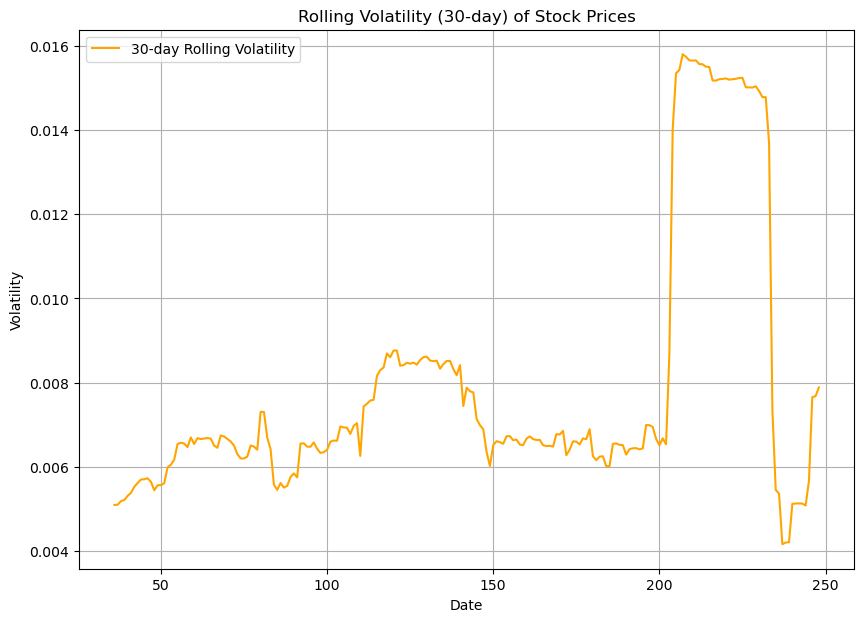

In [31]:
# Calculate rolling volatility (standard deviation of daily returns over a 30-day window)
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

# Plotting rolling volatility
plt.figure(figsize=(10,7))
plt.plot(df.index, df['Volatility'], label='30-day Rolling Volatility', color='orange')
plt.title('Rolling Volatility (30-day) of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.show()

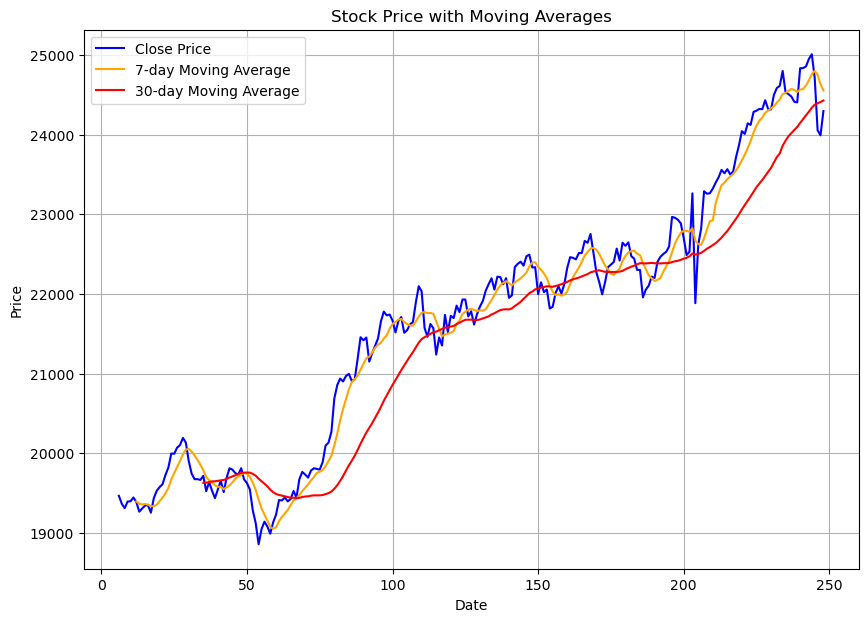

In [32]:
'''creating moving averages which are the statistical calculations used to analyze data trends by
smoothing out short-term fluctuations and highlighting longer-term trends'''

 # Calculate 7-day and 30-day moving averages
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

# Plotting the Close Price and Moving Averages
plt.figure(figsize=(10,7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['7-day MA'], label='7-day Moving Average', color='orange')
plt.plot(df.index, df['30-day MA'], label='30-day Moving Average', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [34]:
# Data Scaling: Normalizing numerical variables 
# List of columns to scale
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)', 
                     'Prev Close', 'Prev High', 'Prev Low', '7-day MA', '30-day MA', 
                     'Daily Return', 'Volatility', 'Rolling_Mean_7', 'Rolling_Std_7']

# Check if all columns exist in the DataFrame
missing_cols = [col for col in columns_to_scale if col not in df.columns]
if missing_cols:
    raise ValueError(f"Columns missing in the DataFrame: {', '.join(missing_cols)}")

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_dataset.csv', index=False)

print("Scaling applied and dataset saved successfully.")

Scaling applied and dataset saved successfully.


In [33]:
print("DATA EXPLORATION COMPLETE!!")

DATA EXPLORATION COMPLETE!!
